## Hotel Demand Forecasting - Exploratory data analysis

### 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 1.1. Pre-define visualization params

In [2]:
# plot style
plt.style.use('ggplot')

# plot title size
plt.rc('axes', titlesize=18)

# plot font size
plt.rc('font', size=13)

# plot figure size
matplotlib.rcParams['figure.figsize'] = (18, 9)

### 1.2. Reading in cleaned hotel/resort datasets

In [3]:
resort = pd.read_csv('H1_cleaned.csv')
hotel = pd.read_csv('H2_cleaned.csv')

## 2. Performing Univariate Analysis [Resort data]

### 2.1. Proportion of Canceled vs Non-canceled bookings

<AxesSubplot:xlabel='IsCanceled', ylabel='count'>

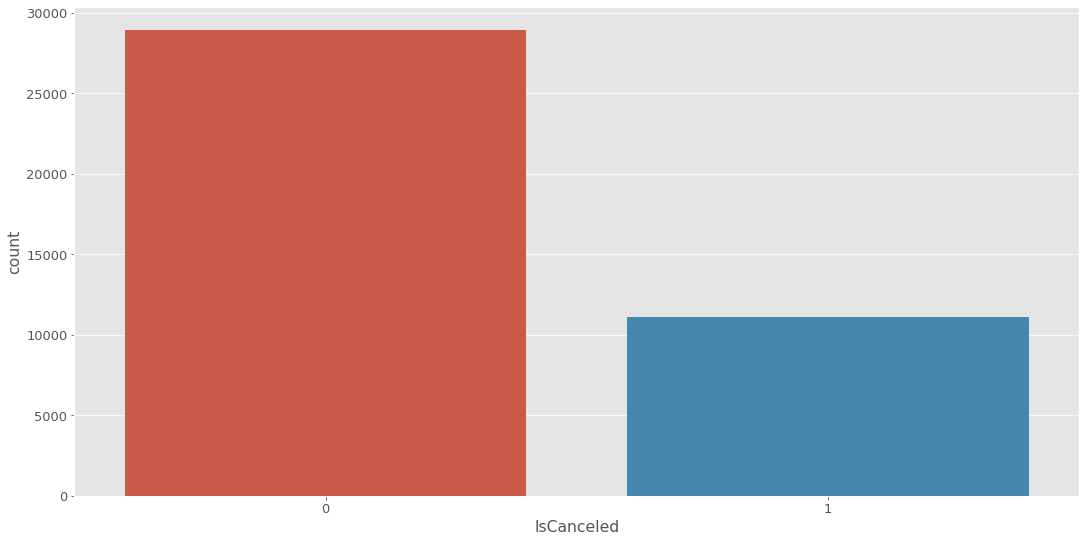

In [4]:
sns.countplot(data=resort, x=resort.IsCanceled)

### 2.2. Distribution of Lead Time for bookings

Visualizes the distribution of Lead time between customer booking and their arrival date.

<AxesSubplot:xlabel='LeadTime', ylabel='Count'>

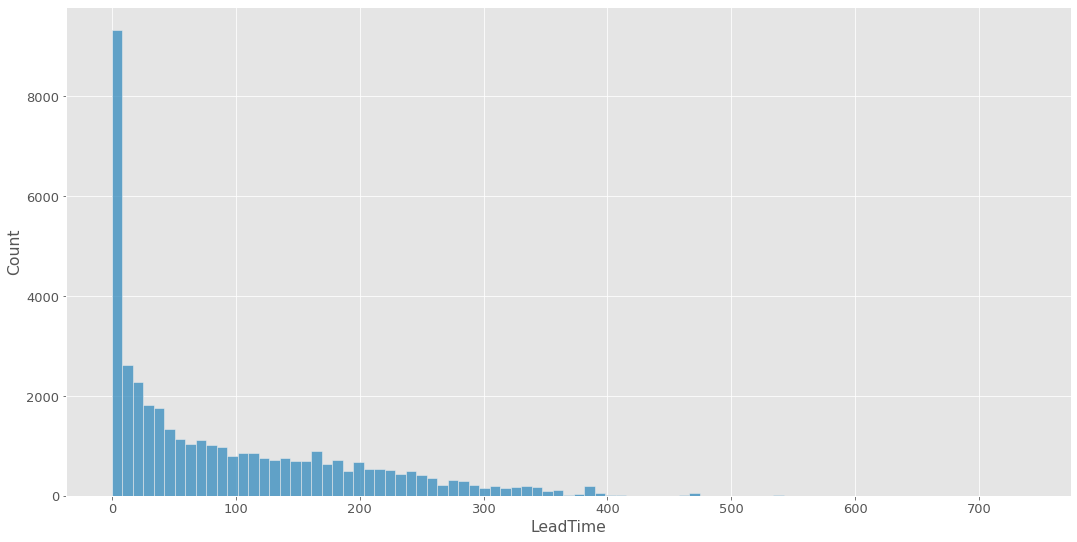

In [5]:
sns.histplot(data=resort, x=resort.LeadTime)

A positively skewed (right-tail) booking lead time data. Telling us that a significant portion of bookings are usually book sponteneously given that the super majority of booking lead time is 0 days between booking and arrival date.

Extremely skewed datas with tail regions that act as outliers typically adversely affect **regression-based** models. However, a work around are the use of **tree-based** models as they are robust to outliers.

### 2.3. Proportion of arrival date's years

<AxesSubplot:xlabel='ArrivalDateYear', ylabel='count'>

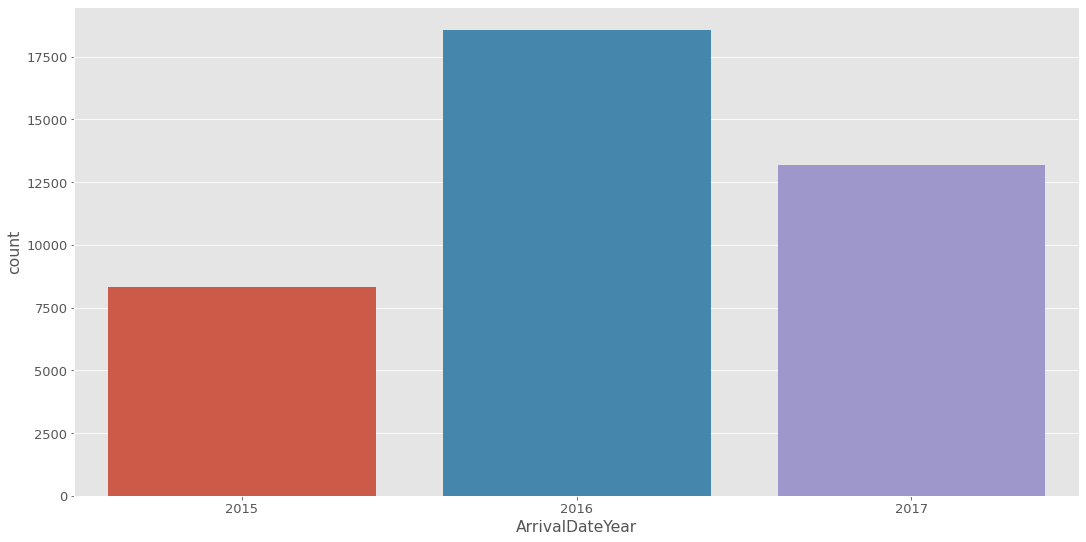

In [6]:
sns.countplot(data=resort, x=resort.ArrivalDateYear)

### 2.4. Proportion of arrival months

<AxesSubplot:xlabel='ArrivalDateMonth', ylabel='count'>

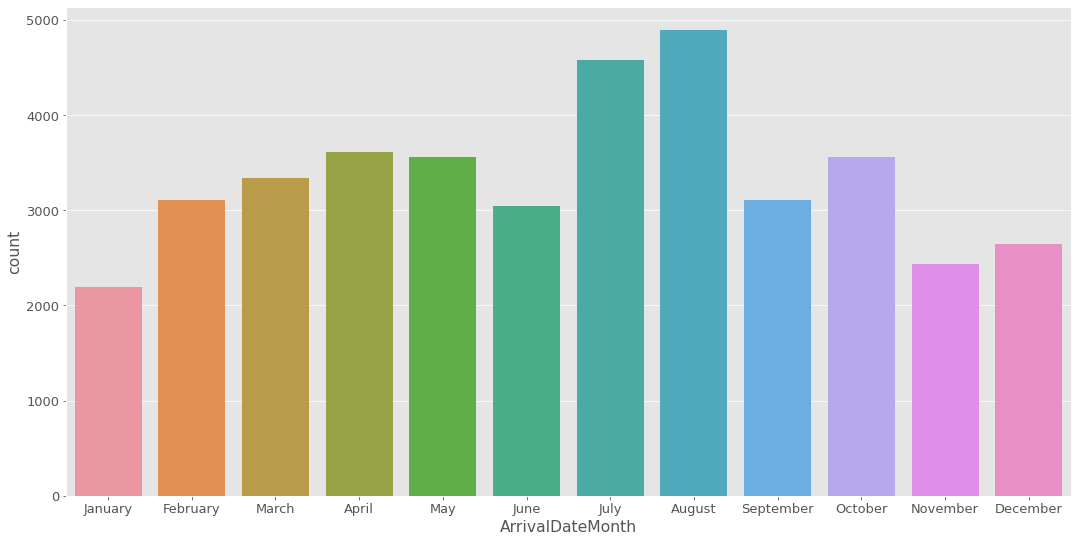

In [7]:
month_order = ['January', 'February', 'March', 'April', 
               'May', 'June', 'July', 'August', 
               'September', 'October', 'November', 'December']
               

sns.countplot(data=resort, x=resort.ArrivalDateMonth, order=month_order)

Having lived in Singapore my entire life, my expectations for the proportion of bookings by month was the highest for June and December given that these were the peak 'holiday-ing' seasons. Yet, upon observing the visualization, I saw that the bookings tend to peak in the months of July and August - which coincides with the US summer season.

### 2.5. Proportion of Week Number 

<AxesSubplot:xlabel='ArrivalDateWeekNumber', ylabel='count'>

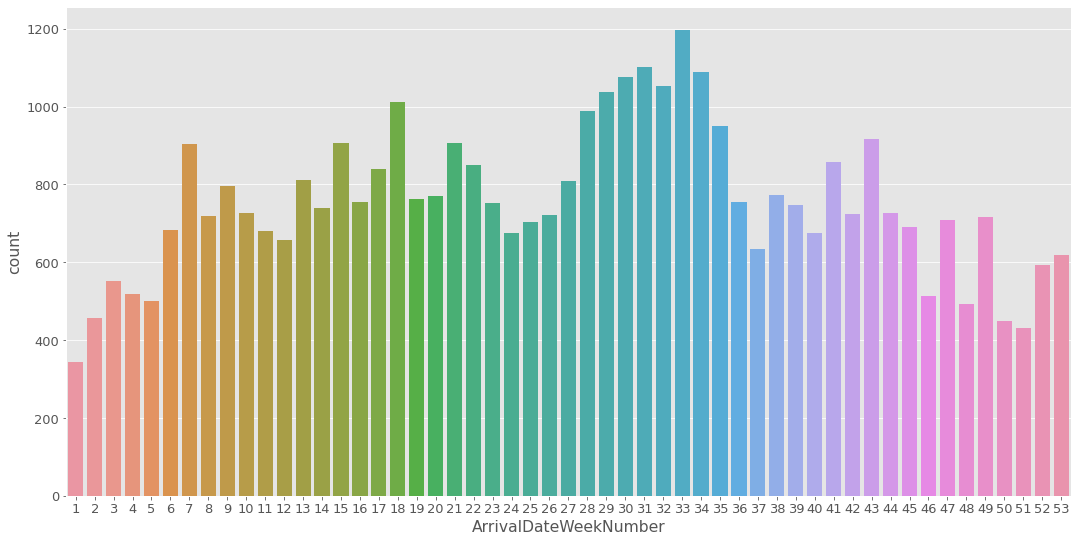

In [8]:
sns.countplot(data=resort, x=resort.ArrivalDateWeekNumber)

Week number should model closely after the count distribution of bookings per month given that it is essentially a more granular version of it.

### 2.6. Distribution of no. of adults per booking

<AxesSubplot:xlabel='Adults', ylabel='count'>

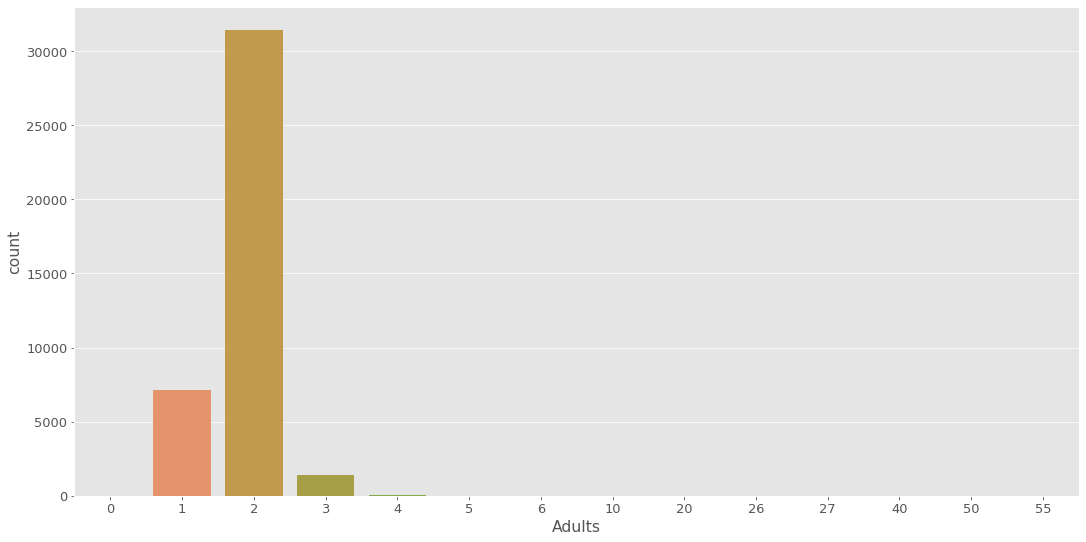

In [9]:
sns.countplot(data=resort, x=resort.Adults)

### 2.7. Distribution of no. of children per booking

<AxesSubplot:xlabel='Children', ylabel='count'>

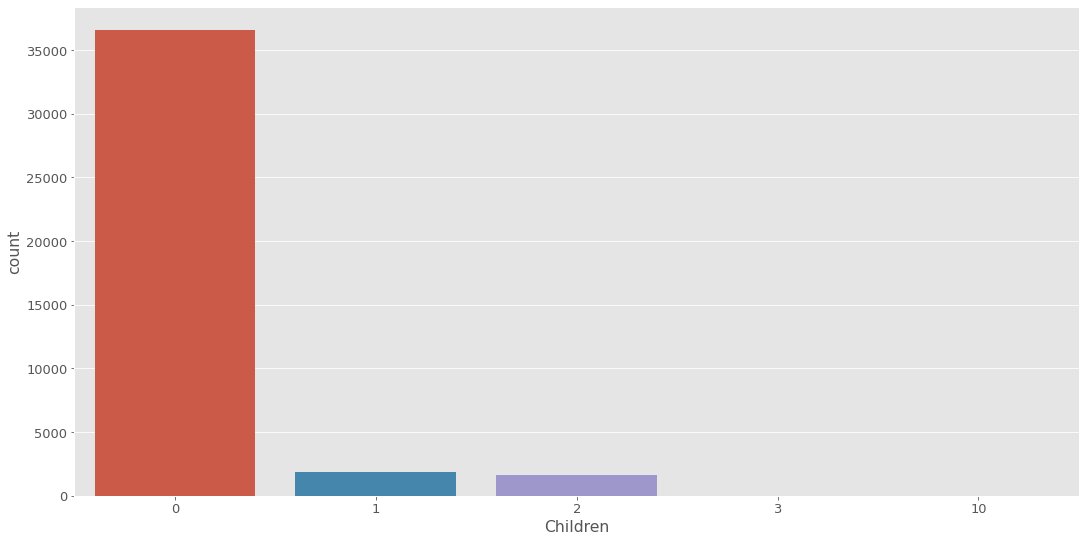

In [10]:
sns.countplot(resort.Children)

### 2.8. Babies count per booking

<AxesSubplot:xlabel='Babies', ylabel='count'>

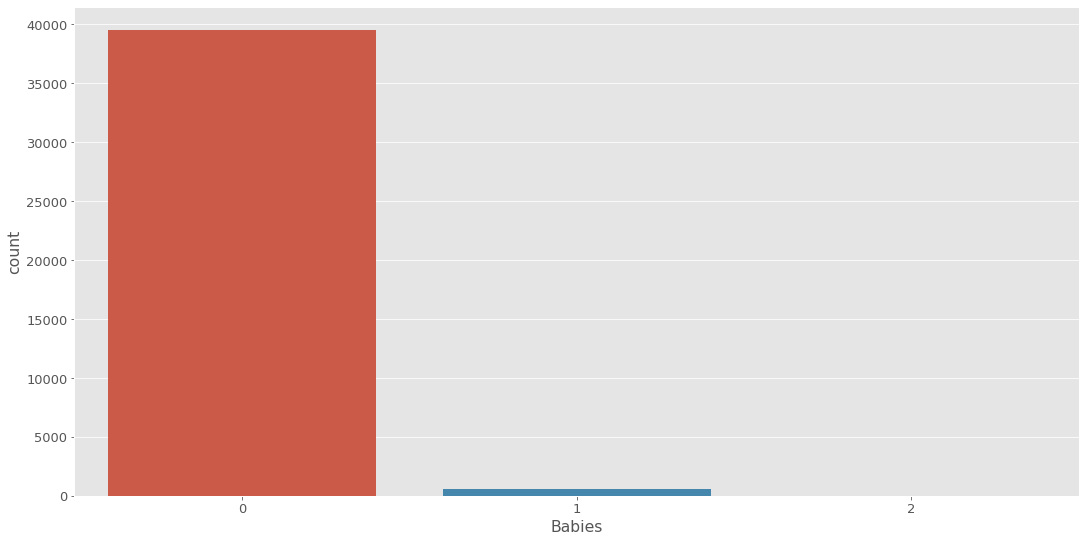

In [11]:
sns.countplot(resort.Babies)

### 2.9. Meal count per booking

<AxesSubplot:xlabel='Meal', ylabel='count'>

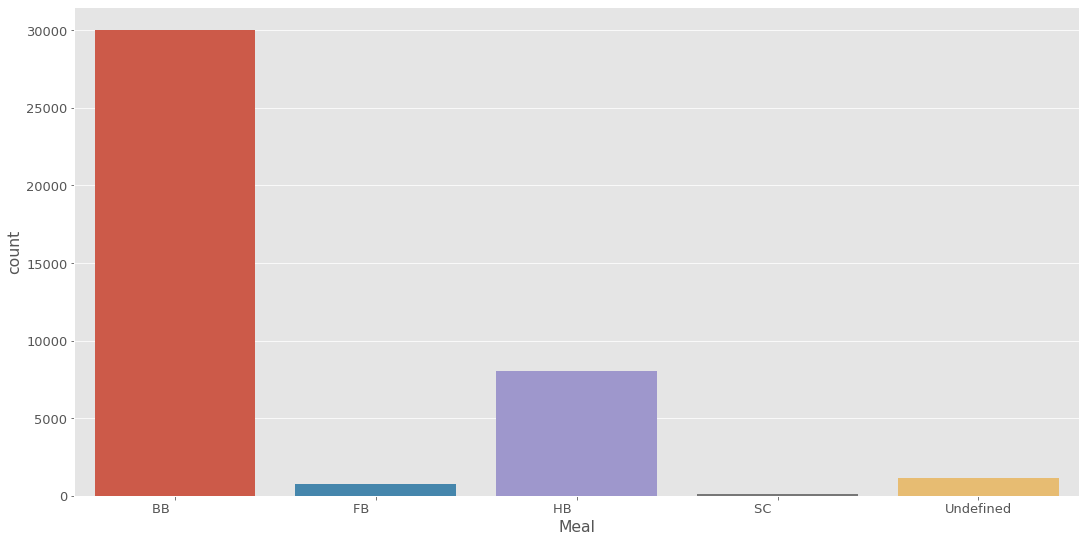

In [12]:
sns.countplot(resort.Meal)

### 2.10. Top 20 booking counts by Countries

In [13]:
resort.Country.value_counts().to_frame().head(20)

,Country
PRT,17630
GBR,6814
ESP,3957
IRL,2166
FRA,1611
DEU,1203
CN,710
NLD,514
USA,479
ITA,459


### 2.11. Proportion of different booking methods

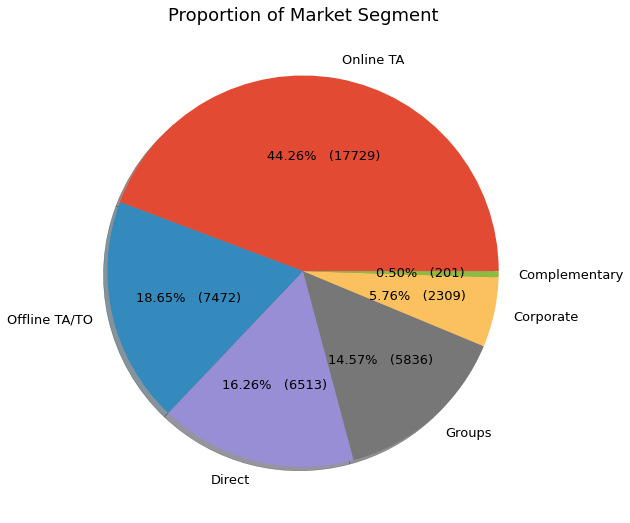

In [14]:
# converting series and it's index into a dict
booking_method_dict = resort.MarketSegment.value_counts().to_dict()
values = list(booking_method_dict.values())

# Creating autocpt arguments, used to supply absolute label values for each segment
def make_autopct(values):
    def my_autopct(pct):
        total=sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%   ({v:d})'.format(p=pct, v=val)
    return my_autopct

plt.pie(values,
        autopct=make_autopct(values),
        shadow=True,
        labels=booking_method_dict.keys())

plt.title('Proportion of Market Segment')

plt.show()

- TA = Travel Agents
- TO = Tour Operators

### 2.12. Proportion of Distribution Channels

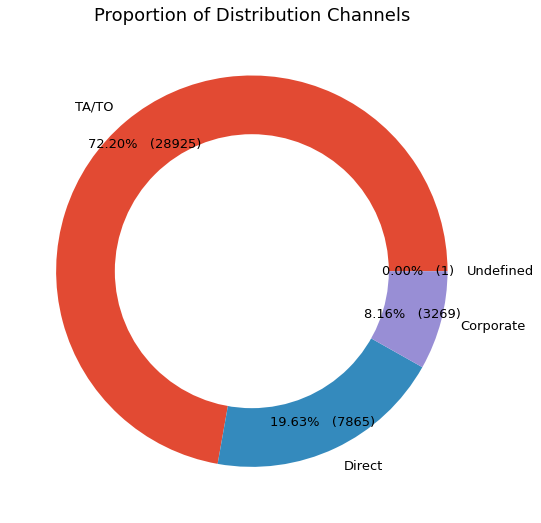

In [15]:
# converting series and it's index into a dict
dc_dict = resort.DistributionChannel.value_counts().to_dict()
values = list(dc_dict.values())

# Creating autocpt arguments, used to supply absolute label values for each segment
def make_autopct(values):
    def my_autopct(pct):
        total=sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%   ({v:d})'.format(p=pct, v=val)
    return my_autopct

plt.pie(dc_dict.values(),
        autopct= make_autopct(values),
        shadow=False,
        labels=dc_dict.keys(),
        pctdistance=0.85)

# creating white circle to fill piechart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# adding white circle to middle of pie chart
fig.gca().add_artist(centre_circle)

plt.title('Proportion of Distribution Channels')

plt.show()

### 2.13. Deposit type of Customers

<AxesSubplot:xlabel='DepositType', ylabel='count'>

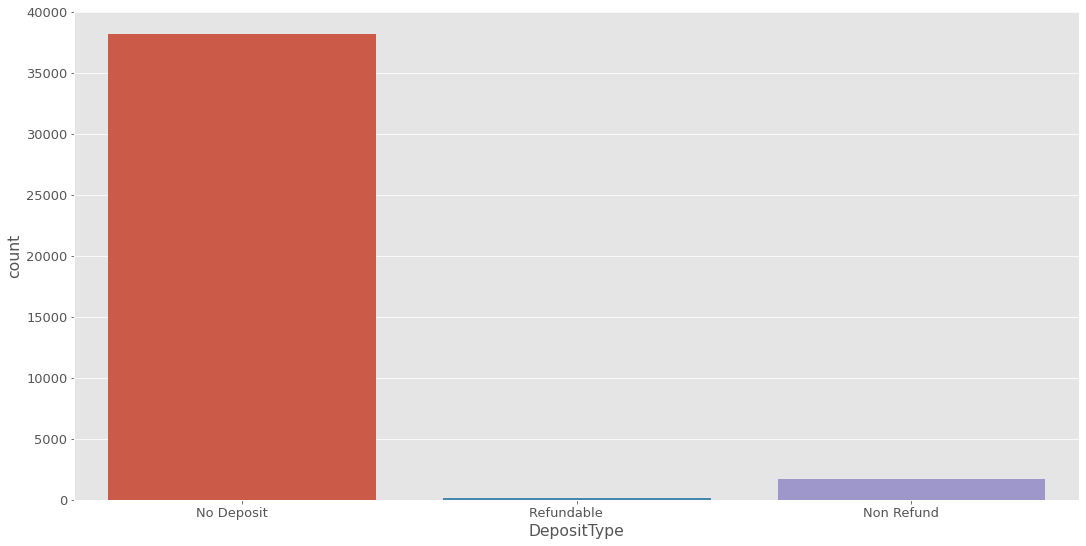

In [16]:
sns.countplot(resort.DepositType)

### 2.14. Top 20 Agents ordered by Bookings done

In [17]:
resort.Agent.value_counts().reset_index().rename(columns={'index': 'Agent Id', 'Agent': 'n_bookings'}).head(20)

,Agent Id,n_bookings
0,240,13905
1,NULL,8209
2,250,2869
3,241,1721
4,40,1002
5,314,927
6,242,779
7,6,607
8,96,537
9,243,514


Agents 2nd Ranked in terms of booking is not valid given that Agent id is 'NULL'. 

### 2.15. Distribution of days in waiting list for a booking

<AxesSubplot:xlabel='DaysInWaitingList', ylabel='Count'>

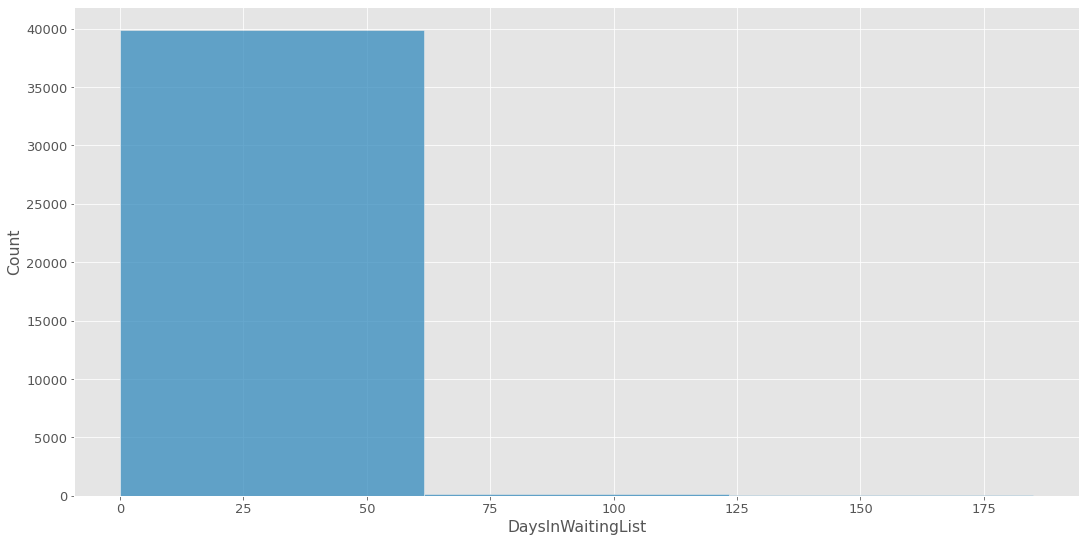

In [18]:
sns.histplot(resort.DaysInWaitingList, bins=3)

### 2.16. Customer Type

<AxesSubplot:xlabel='CustomerType', ylabel='count'>

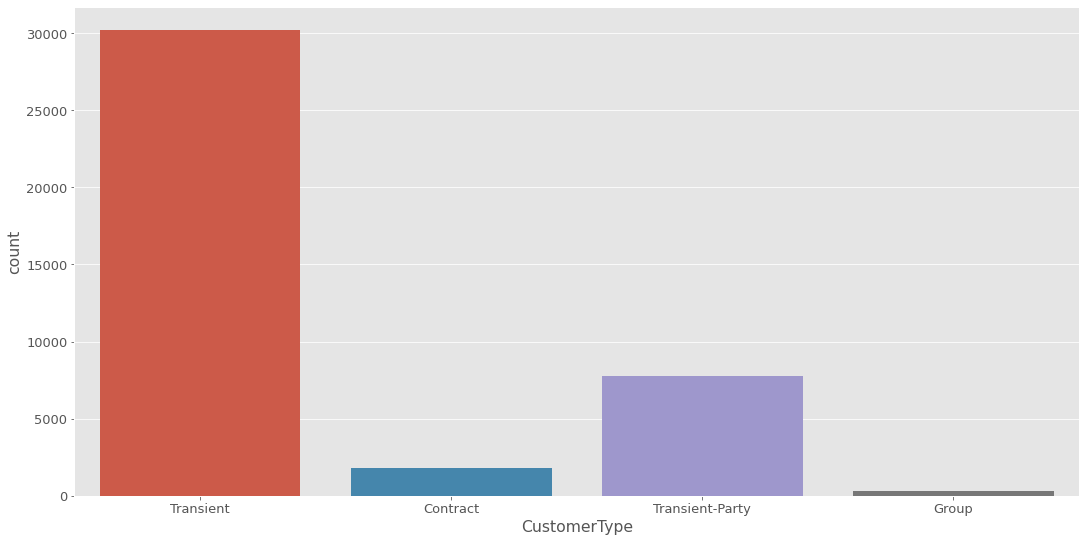

In [19]:
sns.countplot(resort.CustomerType)

- Transient - Temporary, one-timer customers (not associated with other transient bookings)
- Transient-party – when the booking is transient, but is associated to at least other transient booking

### 2.17. Distribution of Average Daily Rate for bookings

<AxesSubplot:xlabel='ADR', ylabel='Count'>

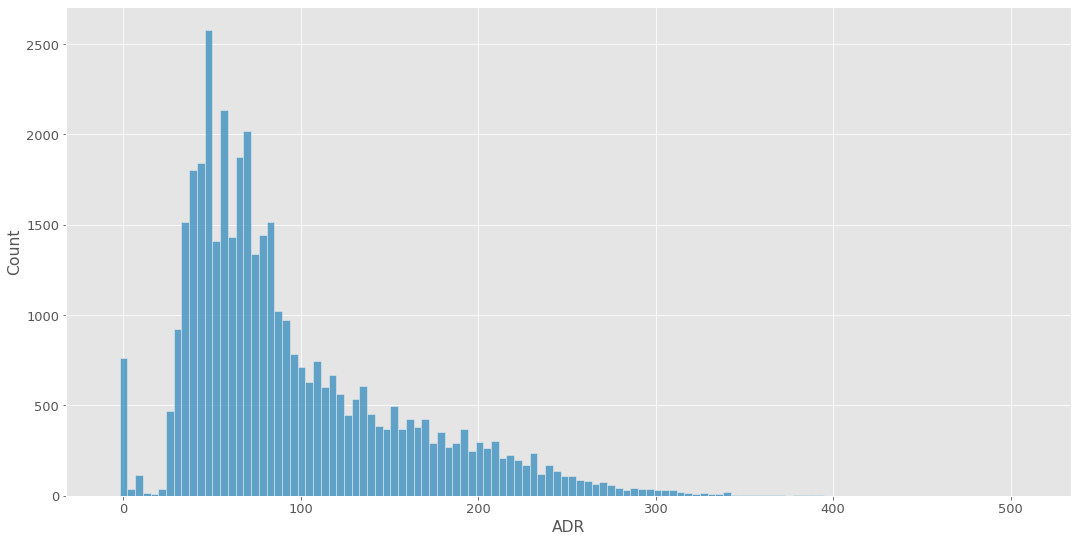

In [20]:
sns.histplot(resort.ADR)

Considering that ADR has an almost direct contribution to a hotel/resort's bottomline, understanding the distribution and analyzing ways to increase the ADR is, in my opinion, one of they key metrics to be paying attention to.

### 2.18. Distribution of Booking's special requests

<AxesSubplot:xlabel='TotalOfSpecialRequests', ylabel='count'>

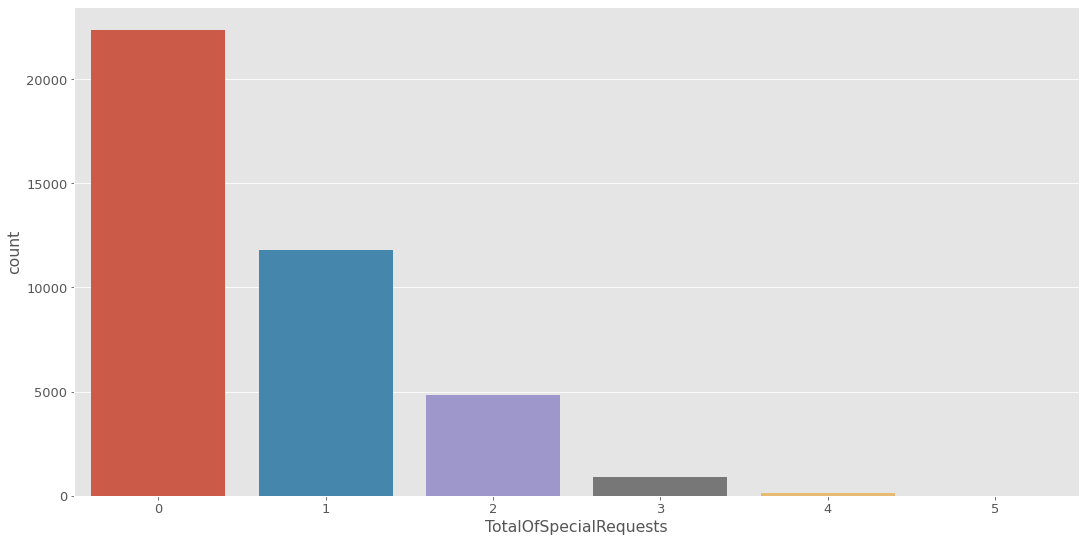

In [21]:
sns.countplot(resort.TotalOfSpecialRequests)

## 3. Performing Bivariate Analysis
- exploring if there are correlation between certain variables.

### 3.1. Correlation between booking lead time and it being cancelled

<AxesSubplot:xlabel='IsCanceled', ylabel='LeadTime'>

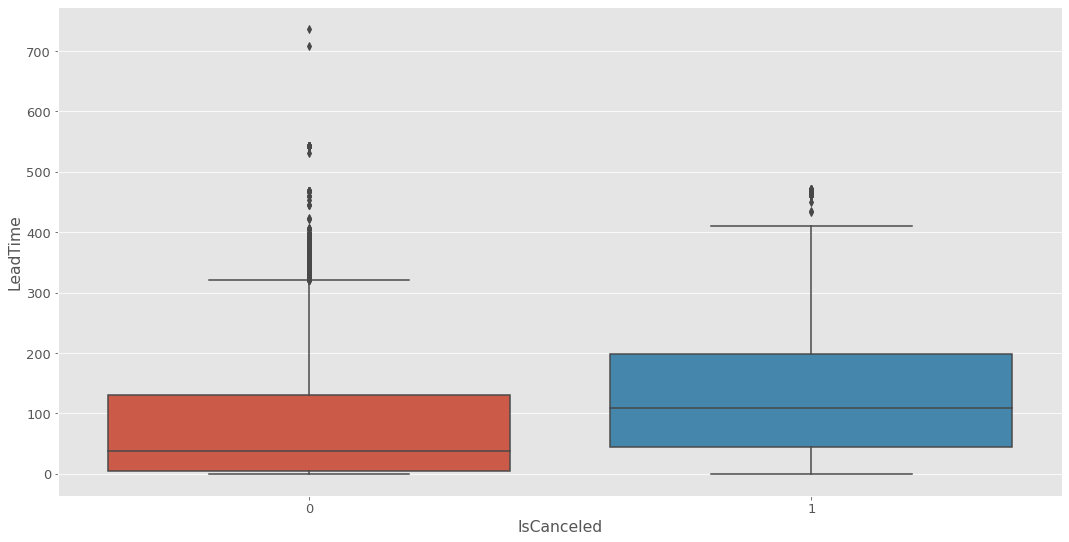

In [22]:
sns.boxplot(data=resort, x=resort.IsCanceled, y=resort.LeadTime)

Visually, there seems to be a quantative difference between lead times of cancelled and normal bookings. To validate the conclusion, we can try and conduct a nonparametric (given that the data is not normally distributed - positively skewed) to determine its statistical significance. Another way to visualize skewness and distribution is through the distribution plot of the Lead Time for Cancelled and Non-cancelled bookings.

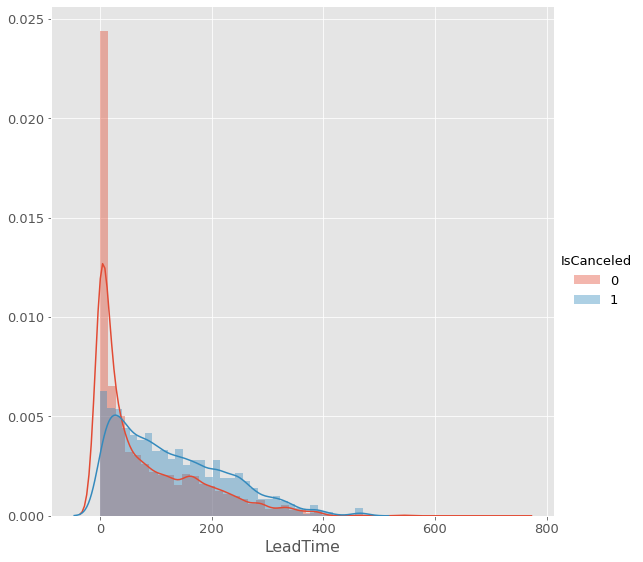

In [23]:
# dist plot
sns.FacetGrid(resort, hue='IsCanceled', size=8).map(sns.distplot, 'LeadTime').add_legend()

### 3.1.1 Statistical Test for significance

- Null Hypothesis - There is **no** difference between the distribution of booking cancellations due to lead time
- Alternate Hypothesis - There is **a** difference between the distribution of booking cancellations due to lead time 

In [24]:
cancelled = resort.query('IsCanceled == 1')['LeadTime'].array
not_cancelled = resort.loc[resort['IsCanceled'] == 0].LeadTime.array

stat, p = stats.mannwhitneyu(cancelled, not_cancelled)

#level of significance
alpha = 0.05
print('Statistics: {} \nP-value:{:.3f}'.format(stat, p))

if p > alpha:
    print('Same distribution, failed to reject null hypothesis')
print('Different distributions, reject null hypothesis.')

Statistics: 103359580.5 
P-value:0.000
Different distributions, reject null hypothesis.


- [P-Values; by Josh Starmer](https://www.youtube.com/watch?v=vemZtEM63GY)
- [P-Values; Explained by a Data Scientist - Towards Data Science](https://towardsdatascience.com/p-values-explained-by-data-scientist-f40a746cfc8)


P-values tells us that the probability of observing a difference between the two sets of data (lead time in cancelled vs non. cancelled) is due to random noise or chance.

Therefore, the closer the p-value is to 0, the more confident and meaningful that the lead times between 'cancelled' and 'not cancelled' are actually different.
Given that the non-parametric test returned a p-value that is less than our alpha of 0.05, we can reject the null hypothesis and conclude that the results supporting the alternate hypothesis are statistically significant.

**Conclusion:** There is a difference between lead time in cancelled vs non. cancelled that is not cause by random noise or chance.

### 3.2. Repeated Guest and ADR

<AxesSubplot:xlabel='IsRepeatedGuest', ylabel='ADR'>

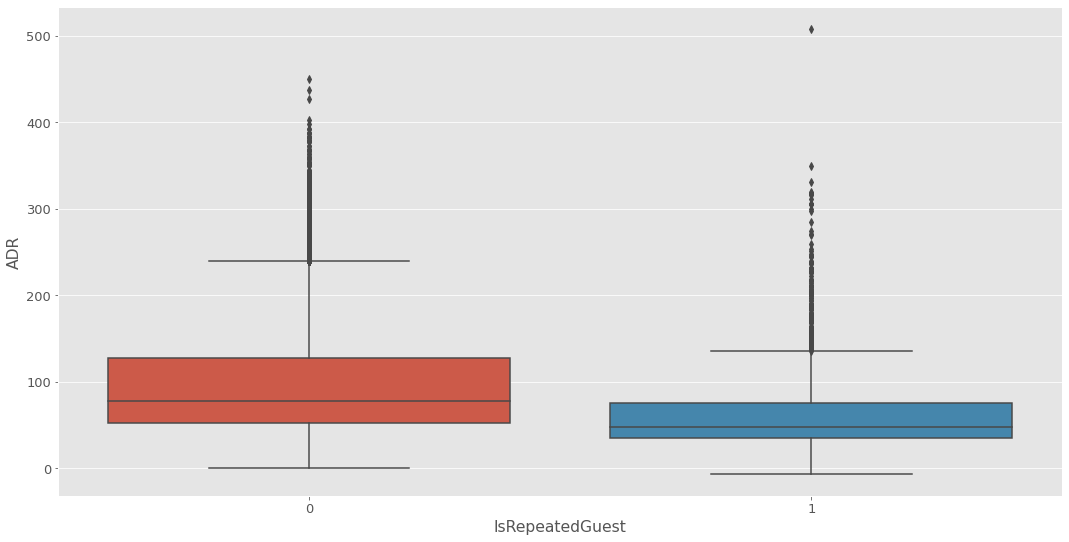

In [25]:
sns.boxplot(x=resort.IsRepeatedGuest, y=resort.ADR)

In [26]:
repeated = resort.query('IsRepeatedGuest == 1').ADR
not_repeated = resort.loc[resort['IsRepeatedGuest'] == 0].ADR

#level of significance
alpha = 0.05
stat, p = stats.mannwhitneyu(repeated, not_repeated)

print('Statistics: {} \nP-value:{:.5f}'.format(stat, p))

if p > alpha:
    print('Same distribution, failed to reject null hypothesis')
print('Different distributions, reject null hypothesis.')

Statistics: 21204029.0 
P-value:0.00000
Different distributions, reject null hypothesis.


## 4. Performing Univariate Analysis [Hotel data]

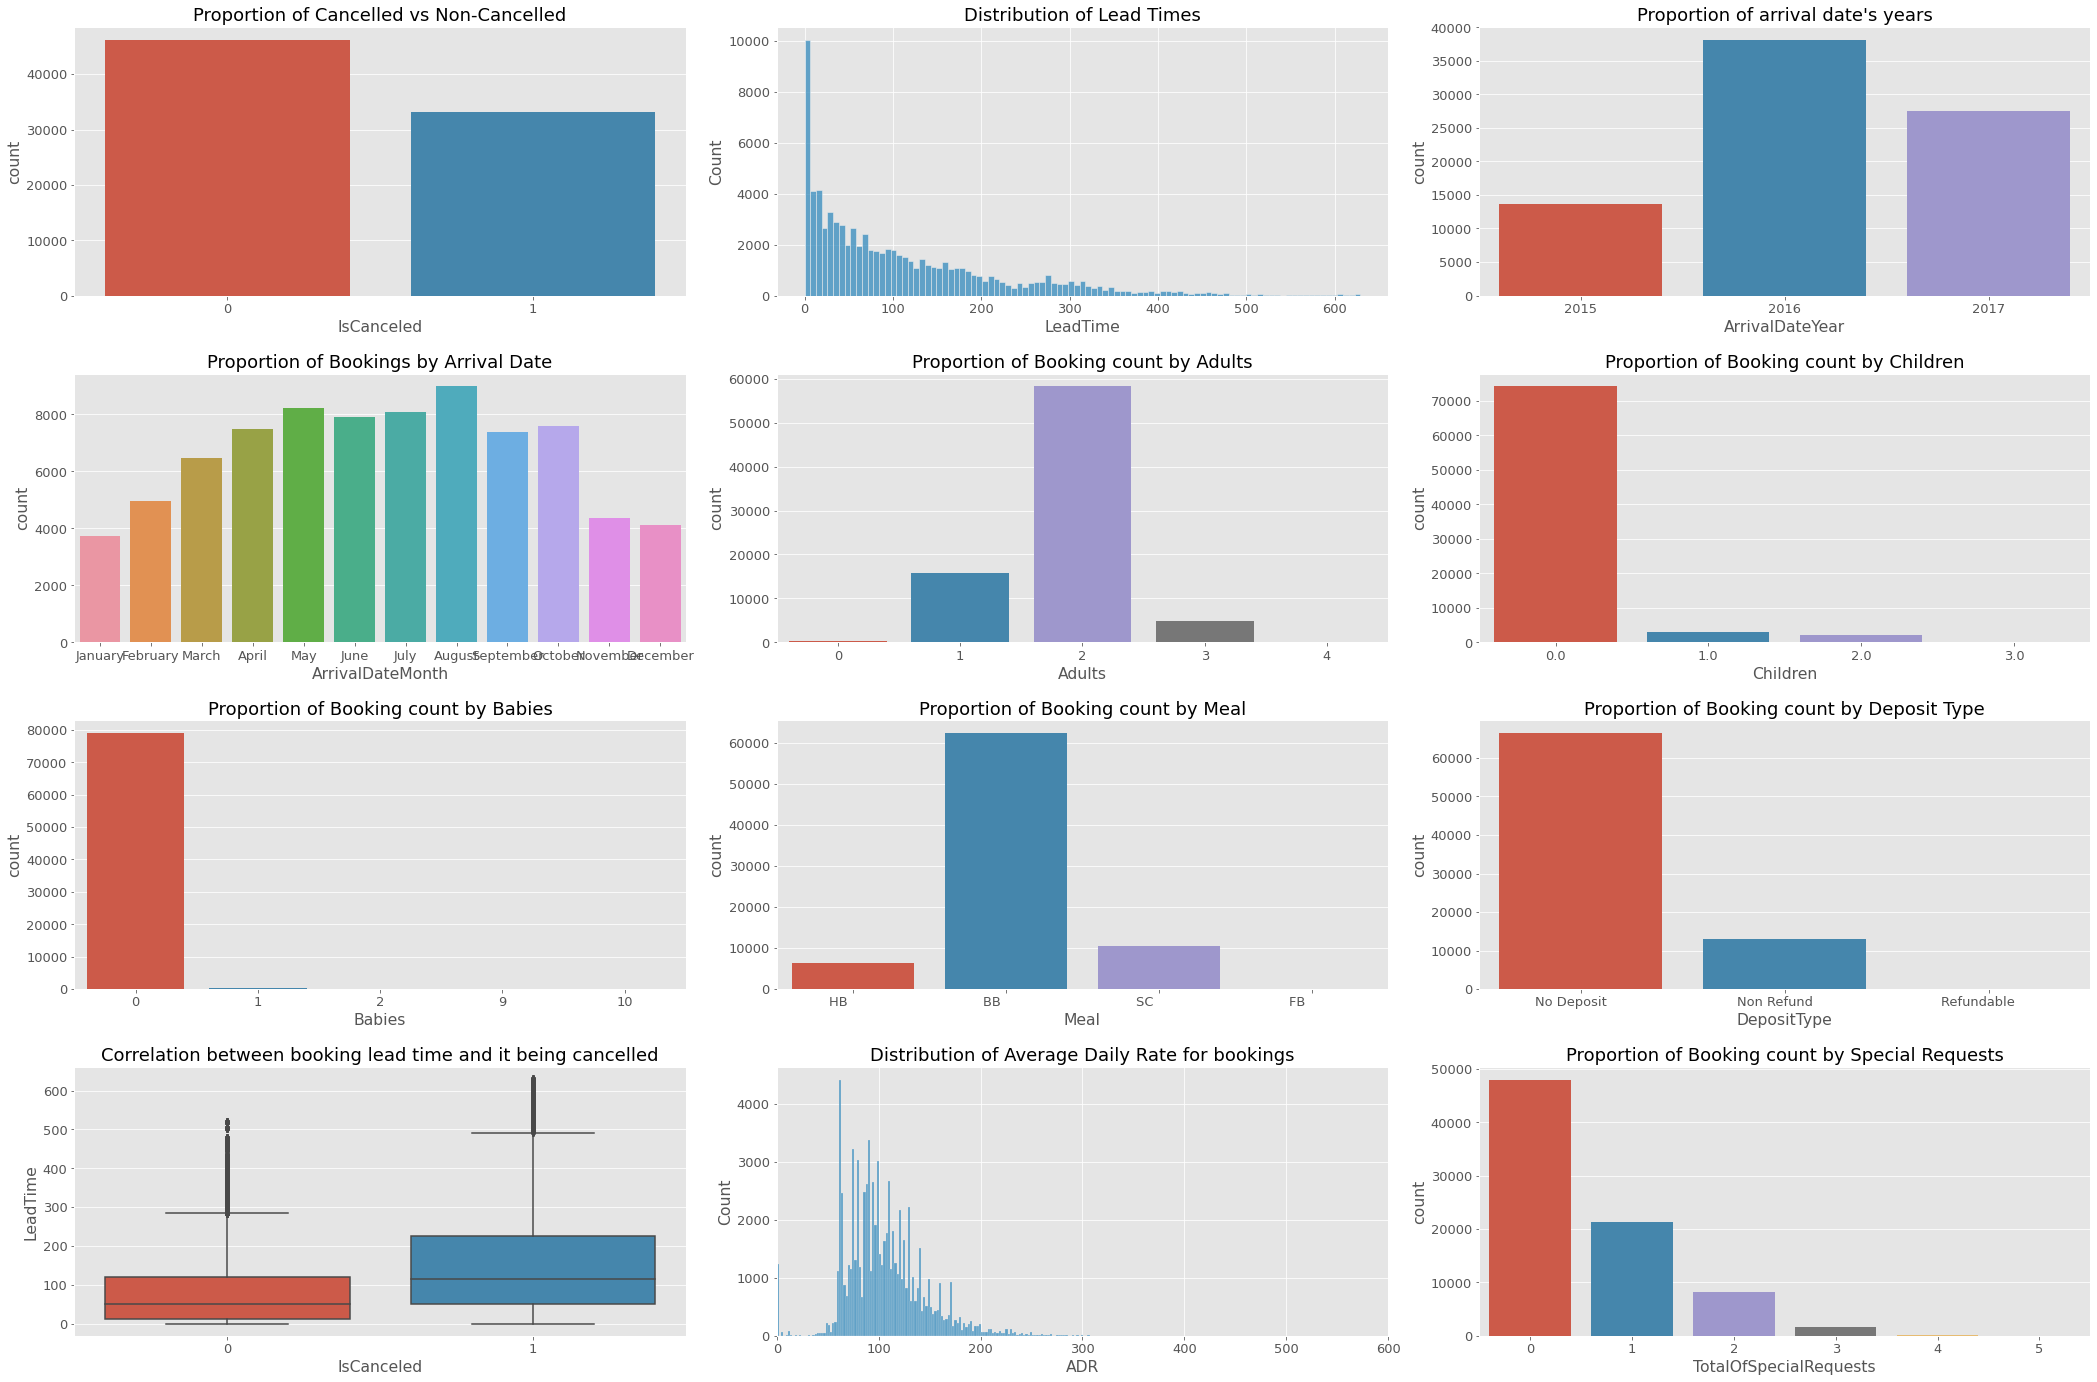

In [27]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(30,20))
fig.tight_layout(pad=4.08)

plt.subplot(4, 3, 1)
sns.countplot(data=hotel, x=hotel.IsCanceled)
plt.title('Proportion of Cancelled vs Non-Cancelled')

plt.subplot(4, 3, 2)
sns.histplot(data=hotel, x=hotel.LeadTime)
plt.title('Distribution of Lead Times')

plt.subplot(4, 3, 3)
sns.countplot(data=hotel, x=hotel.ArrivalDateYear)
plt.title("Proportion of arrival date's years")

plt.subplot(4, 3, 4)
month_order = ['January', 'February', 'March', 'April', 
               'May', 'June', 'July', 'August', 
               'September', 'October', 'November', 'December']
sns.countplot(data=hotel, x=hotel.ArrivalDateMonth, order=month_order)
plt.title('Proportion of Bookings by Arrival Date')

plt.subplot(4, 3, 5)
sns.countplot(data=hotel, x=hotel.Adults)
plt.title('Proportion of Booking count by Adults')

plt.subplot(4, 3, 6)
sns.countplot(hotel.Children)
plt.title('Proportion of Booking count by Children')

plt.subplot(4, 3, 7)
sns.countplot(hotel.Babies)
plt.title('Proportion of Booking count by Babies')

plt.subplot(4, 3, 8)
sns.countplot(hotel.Meal)
plt.title('Proportion of Booking count by Meal')

plt.subplot(4, 3, 9)
sns.countplot(hotel.DepositType)
plt.title('Proportion of Booking count by Deposit Type')

plt.subplot(4, 3, 10)
sns.boxplot(data=hotel, x=hotel.IsCanceled, y=hotel.LeadTime)
plt.title('Correlation between booking lead time and it being cancelled')

# outlier in ADR
plt.subplot(4, 3, 11)
plt.xlim(0, 600)
sns.histplot(hotel.ADR)
plt.title('Distribution of Average Daily Rate for bookings')

plt.subplot(4, 3, 12)
sns.countplot(hotel.TotalOfSpecialRequests)
plt.title('Proportion of Booking count by Special Requests')
plt.show()


There is an outlier value in Average Daily Rate (ADR) for hotel bookings affecting the histogram distribution, hence, we set the x-axis limit to exclude the outlier so that we can have a better visualization of the distribution.

Text(0.5, 1.0, 'Proportion of Distribution Channels')

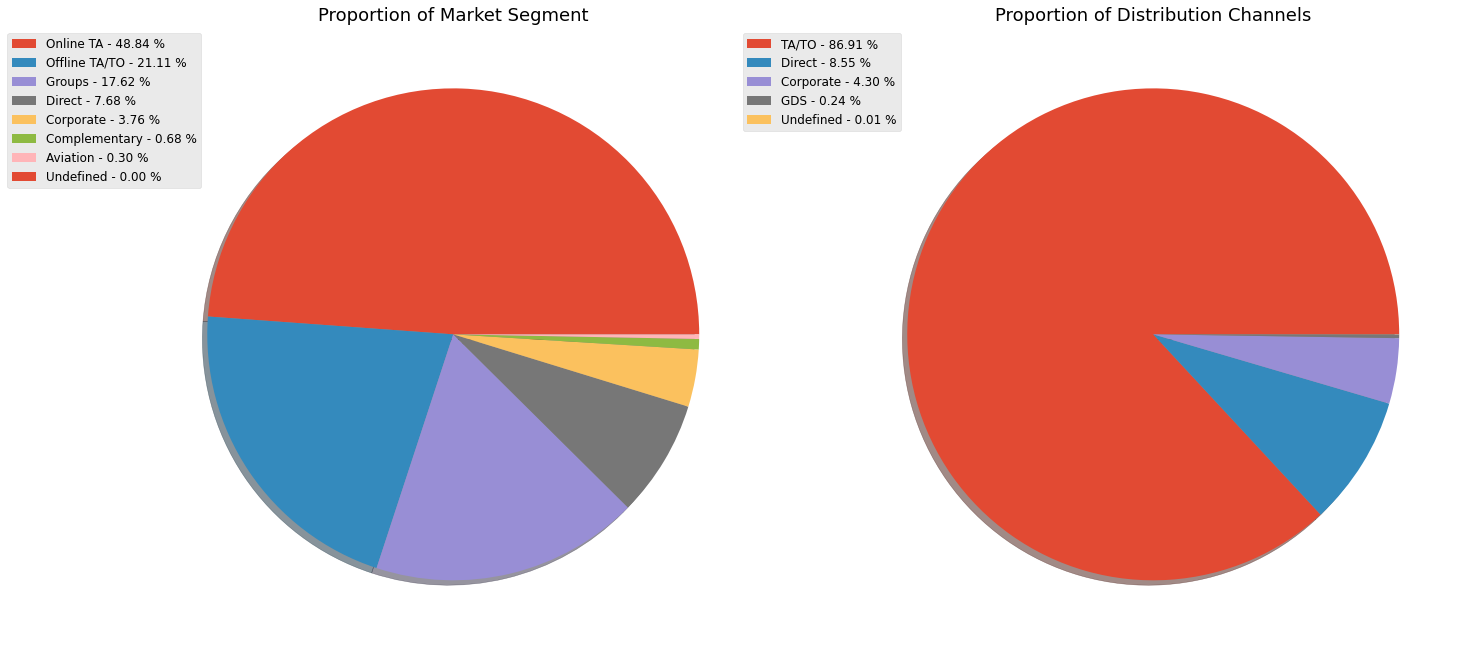

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
fig.tight_layout(pad=3.08)

plt.subplot(1, 2, 1)
# converting series and it's index into a dict
booking_method_dict = hotel.MarketSegment.value_counts().to_dict()
x = list(booking_method_dict.keys())
y = np.array(list(booking_method_dict.values()))
percent = 100.*y/y.sum()
patches, texts = plt.pie(y, shadow=True)
labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(x, percent)]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))
plt.legend(patches, labels, loc='best', bbox_to_anchor=(0.1, 1.), fontsize=12)
plt.title('Proportion of Market Segment')


plt.subplot(1, 2, 2)
# converting series and it's index into a dict
dc_dict = hotel.DistributionChannel.value_counts().to_dict()
x = list(dc_dict.keys())
y = np.array(list(dc_dict.values()))
percent = 100.*y/y.sum()
patches, texts = plt.pie(y, shadow=True)
labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))
    
plt.legend(patches, labels, loc='best', bbox_to_anchor=(0.1, 1.), fontsize=12)
plt.title('Proportion of Distribution Channels')

In [35]:
hotel.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate'],
      dtype='object')

## 5. Correlation between Variables

<AxesSubplot:>

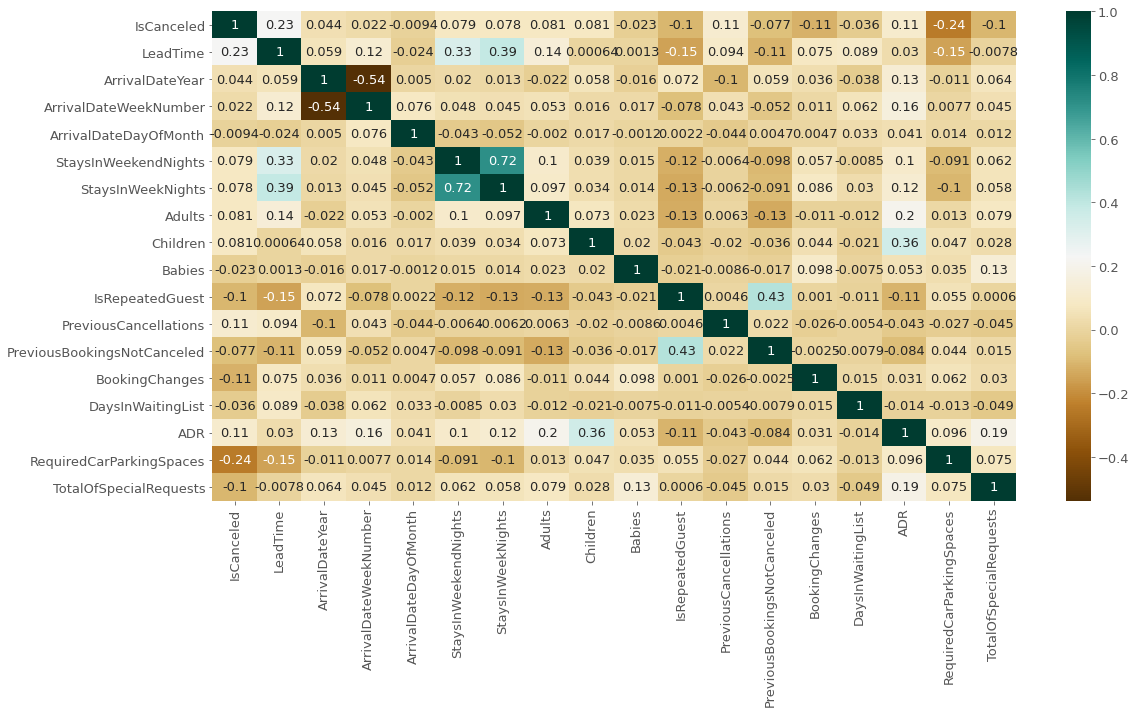

In [43]:
sns.heatmap(resort.corr(), cmap='BrBG', annot=True)

<AxesSubplot:>

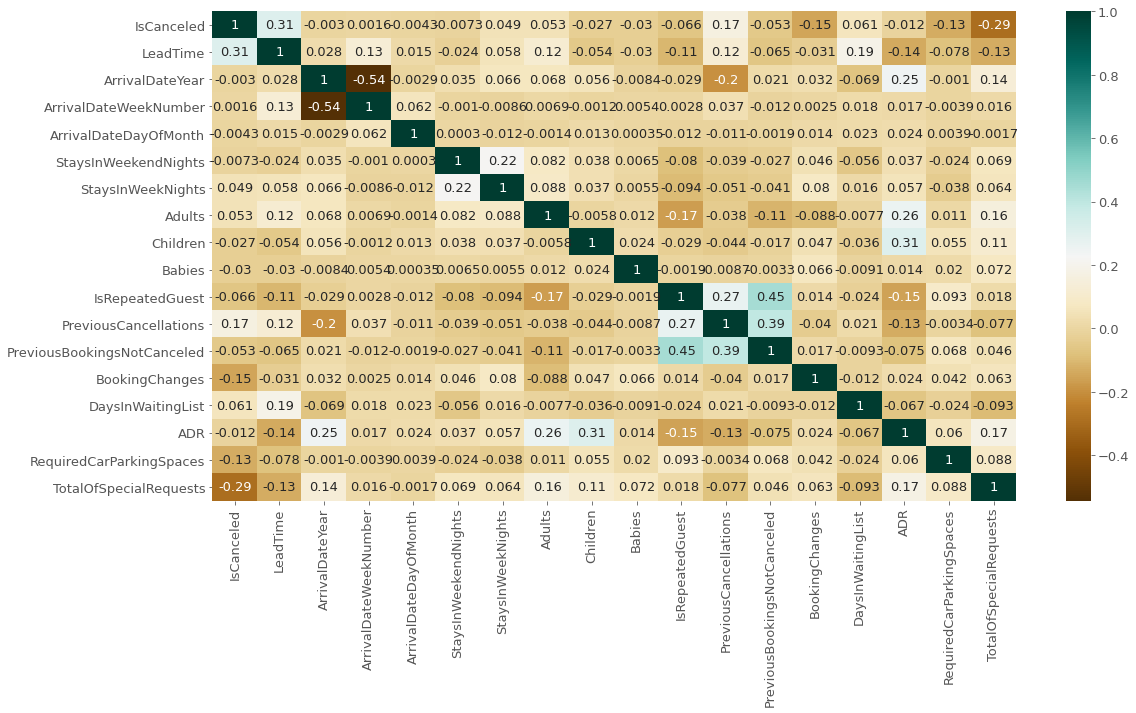

In [44]:
sns.heatmap(hotel.corr(), cmap='BrBG', annot=True)